In [46]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import CrossEntropyLoss
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

For Conversion of Image to Tensor

In [47]:
transform = transforms.Compose([transforms.ToTensor()])

Train Data 

In [48]:
train_data = datasets.MNIST(
    root="../Datasets/mnist_dataset",          # Directory where data will be stored
    train=True,           
    download=True,        
    transform=transform  
)

Test Data

In [49]:
test_data=datasets.MNIST(
    root="../Datasets/mnist_dataset",          # Directory where data will be stored
    train=False,           
    download=True,        
    transform=transform  
)

Making a Train and Test DataLoader

In [50]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=False)

Visualizing Data

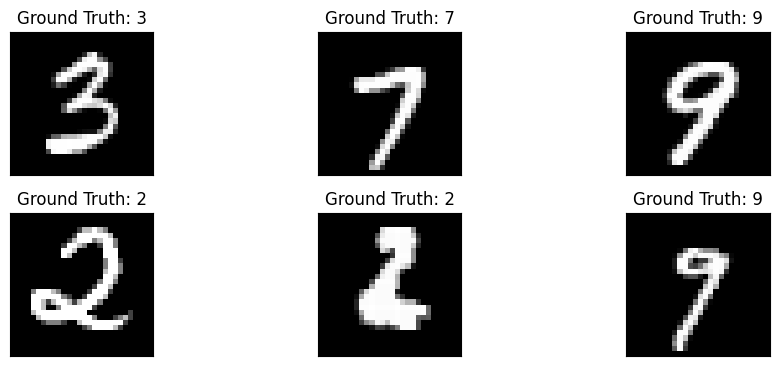

In [51]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    # [0] selects the first channel; cmap='gray' shows it in black and white
    plt.imshow(images[i][0], cmap='gray', interpolation='none')
    plt.title(f"Ground Truth: {labels[i]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [52]:
model=nn.Sequential(
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [53]:
criterion=CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

Training and Testing Loop

In [56]:
training_loss=[]
testing_loss=[]
num_epochs=25
for epochs in range(num_epochs):
    model.train()
    loop=tqdm(train_loader,leave=True)
    running_training_loss=0.0
    for inputs,labels in loop:
        outputs=model(inputs.view(-1,28*28))
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_training_loss+=loss.item()
        optimizer.zero_grad()
    average_training_loss=running_training_loss/len(train_loader)
    training_loss.append(average_training_loss)
    
    model.eval()
    with torch.no_grad():
        running_testing_loss=0.0
        for inputs,labels in test_loader:
            outputs=model(inputs.view(-1,28*28))
            loss=criterion(outputs,labels)
            running_testing_loss+=loss.item()
        average_test_loss=running_testing_loss/len(test_loader)
        testing_loss.append(average_test_loss)
    tqdm.write(f"Epoch {epochs+1}/{num_epochs},Training Loss: {average_training_loss:.4f}, Testing Loss: {average_test_loss:.4f}")

100%|██████████| 938/938 [00:09<00:00, 97.99it/s] 


Epoch 1/25,Training Loss: 0.2476, Testing Loss: 0.2358


100%|██████████| 938/938 [00:09<00:00, 98.44it/s] 


Epoch 2/25,Training Loss: 0.2381, Testing Loss: 0.2279


100%|██████████| 938/938 [00:09<00:00, 95.39it/s] 


Epoch 3/25,Training Loss: 0.2300, Testing Loss: 0.2194


100%|██████████| 938/938 [00:12<00:00, 72.88it/s]


Epoch 4/25,Training Loss: 0.2222, Testing Loss: 0.2137


100%|██████████| 938/938 [00:12<00:00, 74.40it/s]


Epoch 5/25,Training Loss: 0.2148, Testing Loss: 0.2056


100%|██████████| 938/938 [00:11<00:00, 78.21it/s]


Epoch 6/25,Training Loss: 0.2080, Testing Loss: 0.1996


100%|██████████| 938/938 [00:11<00:00, 78.69it/s]


Epoch 7/25,Training Loss: 0.2016, Testing Loss: 0.1949


100%|██████████| 938/938 [00:12<00:00, 77.84it/s]


Epoch 8/25,Training Loss: 0.1956, Testing Loss: 0.1901


100%|██████████| 938/938 [00:11<00:00, 78.32it/s]


Epoch 9/25,Training Loss: 0.1899, Testing Loss: 0.1857


100%|██████████| 938/938 [00:11<00:00, 79.21it/s]


Epoch 10/25,Training Loss: 0.1845, Testing Loss: 0.1805


100%|██████████| 938/938 [00:10<00:00, 86.17it/s]


Epoch 11/25,Training Loss: 0.1794, Testing Loss: 0.1755


100%|██████████| 938/938 [00:10<00:00, 86.19it/s]


Epoch 12/25,Training Loss: 0.1745, Testing Loss: 0.1710


100%|██████████| 938/938 [00:11<00:00, 84.15it/s]


Epoch 13/25,Training Loss: 0.1699, Testing Loss: 0.1678


100%|██████████| 938/938 [00:11<00:00, 84.57it/s]


Epoch 14/25,Training Loss: 0.1655, Testing Loss: 0.1644


100%|██████████| 938/938 [00:11<00:00, 84.77it/s]


Epoch 15/25,Training Loss: 0.1612, Testing Loss: 0.1597


100%|██████████| 938/938 [00:10<00:00, 85.29it/s]


Epoch 16/25,Training Loss: 0.1573, Testing Loss: 0.1562


100%|██████████| 938/938 [00:11<00:00, 84.84it/s]


Epoch 17/25,Training Loss: 0.1534, Testing Loss: 0.1530


100%|██████████| 938/938 [00:10<00:00, 85.47it/s]


Epoch 18/25,Training Loss: 0.1497, Testing Loss: 0.1499


100%|██████████| 938/938 [00:10<00:00, 85.83it/s]


Epoch 19/25,Training Loss: 0.1463, Testing Loss: 0.1475


100%|██████████| 938/938 [00:11<00:00, 84.83it/s]


Epoch 20/25,Training Loss: 0.1430, Testing Loss: 0.1445


100%|██████████| 938/938 [00:11<00:00, 84.95it/s]


Epoch 21/25,Training Loss: 0.1397, Testing Loss: 0.1413


100%|██████████| 938/938 [00:11<00:00, 84.92it/s]


Epoch 22/25,Training Loss: 0.1367, Testing Loss: 0.1394


100%|██████████| 938/938 [00:10<00:00, 85.69it/s]


Epoch 23/25,Training Loss: 0.1338, Testing Loss: 0.1374


100%|██████████| 938/938 [00:10<00:00, 85.63it/s]


Epoch 24/25,Training Loss: 0.1311, Testing Loss: 0.1341


100%|██████████| 938/938 [00:10<00:00, 86.86it/s]


Epoch 25/25,Training Loss: 0.1284, Testing Loss: 0.1320


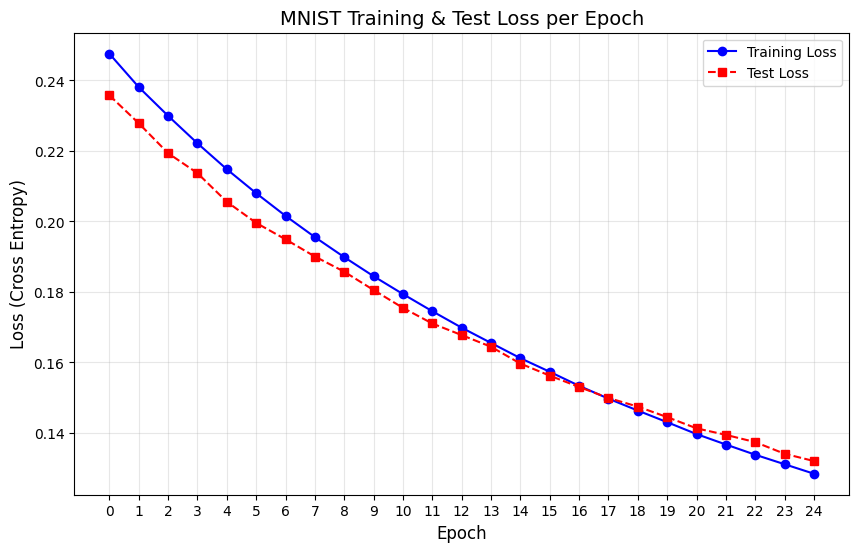

In [57]:
# 1. Create the plot
plt.figure(figsize=(10, 6))

# 2. Plot both lines
plt.plot(training_loss, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(testing_loss, label='Test Loss', color='red', linestyle='--', marker='s')

# 3. Add labels and title
plt.title('MNIST Training & Test Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Cross Entropy)', fontsize=12)

# 4. Customizing the X-axis (showing only integer epoch numbers)
plt.xticks(range(0, len(training_loss)))

# 5. Add a legend and grid for readability
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Show the final result
plt.show()

For Prediction using Model

In [68]:
model.eval()
inputs,labels=next(iter(test_loader))

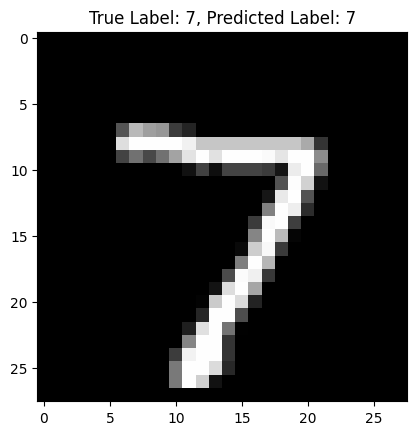

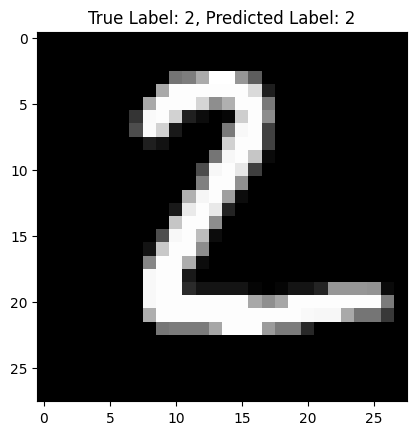

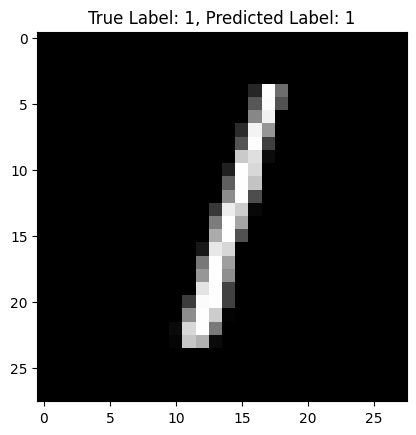

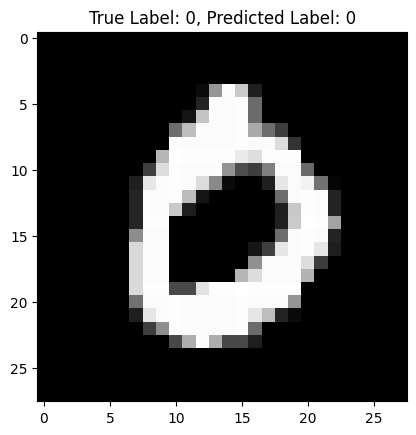

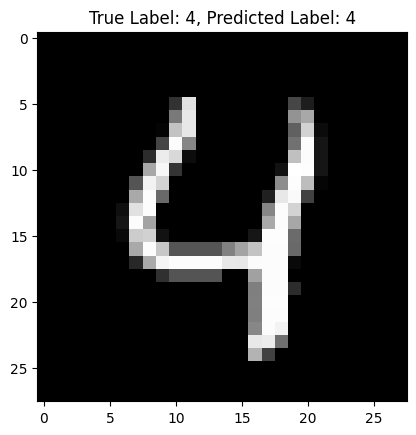

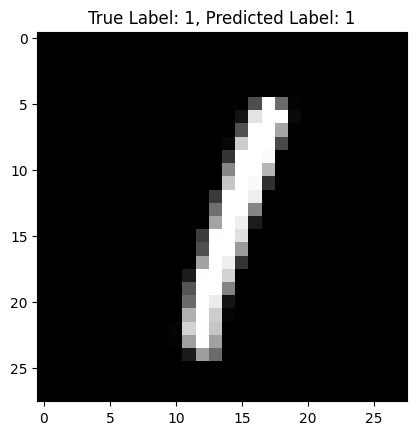

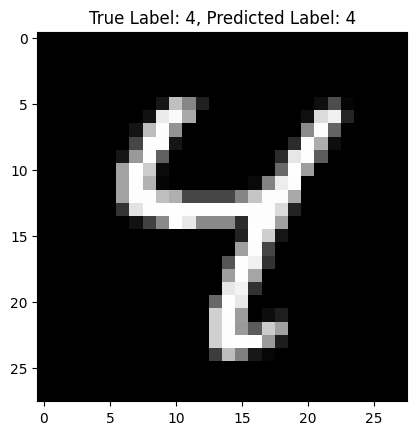

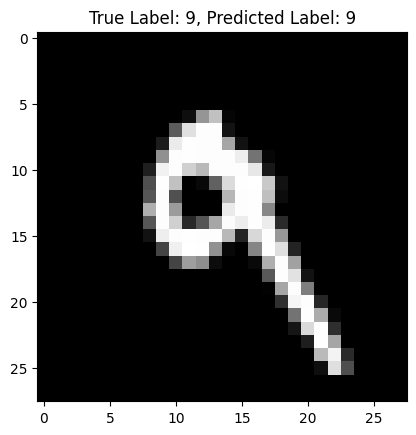

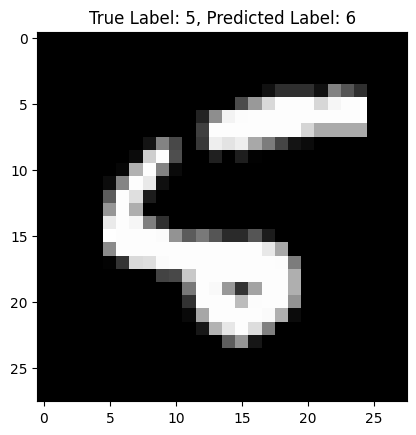

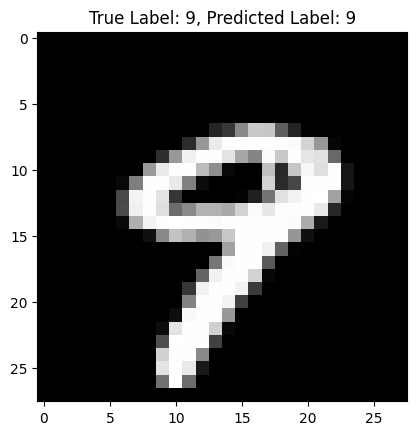

In [70]:
for i in range(10):
    image=inputs[i]
    true_label=labels[i]
    with torch.no_grad():
        output=model(image.view(-1,28*28))
        prediction=output.argmax(dim=1).item()
    image.squeeze_() 
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted Label: {prediction}")
    plt.show()